<a href="https://colab.research.google.com/github/yfb2022/CONTEST_SPORTS/blob/main/SCOUTAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 원본 데이터프레임

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/fm_final.csv')
df.head()
df = df.drop(columns=df.columns[0])

In [ ]:
# 주발 피처
def compare_preferred_foot(df):
    left = df['Left Foot']
    right = df['Right Foot']
    # 특정 발 능력치가 17 이상이면 양발 처리
    if left > right:
      if right >= 17:
        return 'both'
      else:
        return 'left'

    elif right > left:
      if left >= 17:
        return 'both'
      else:
        return 'right'

    else:
      return 'both'

df['preferred_foot'] = df.apply(compare_preferred_foot, axis=1)

In [ ]:
# 분석용 데이터프레임 만들기
df2 = df.copy()
df2 = df.drop(columns=['Date of birth','Salary'])
df2.head()

Name Position  Age   ca   pa     Nationality  \
0     Kevin De Bruyne   MC,AMC   32  189  189         Belgium   
1       Kylian Mbappé       ST   25  188  197          France   
2  Robert Lewandowski       ST   35  186  190          Poland   
3      Erling Haaland       ST   23  185  195  Norway,England   
4       Mohamed Salah      AMR   31  185  187           Egypt   

                  Club  Corners  Crossing  Dribbling  ...  Punching(GK)  \
0      Manchester City       14        19         15  ...             2   
1  Paris Saint-Germain       13        13         18  ...             1   
2            Barcelona        3         8         13  ...             1   
3      Manchester City        7        10         14  ...             3   
4            Liverpool       12        14         17  ...             3   

   Throwing(GK)  Height  Weight  Left Foot  Right Foot  World reputation  \
0             1     181      68         16          20              9400   
1             2     178      73         10          20              9248   
2             1     185      81         13          20              9250   
3             2     195      88         20          11              8750   
4             2     175      72         20           8              8750   

   pics  video  preferred_foot  
0  None   None           right  
1  None   None           right  
2  None   None           right  
3  None   None            left  
4  None   None            left  

[5 rows x 67 columns]

In [ ]:
# 결측값 확인
df2.isnull().sum()

Name                0
Position            0
Age                 0
ca                  0
pa                  0
                   ..
Right Foot          0
World reputation    0
pics                0
video               0
preferred_foot      0
Length: 67, dtype: int64

In [ ]:
# 범주형 데이터 전처리 (주발, 포지션 인코딩)
len(df2['preferred_foot'].unique())

3

In [ ]:
print(len(df2['Position'].unique()))
positions = df2['Position'].unique()
positions

44


array(['MC,AMC', 'ST', 'AMR', 'GK', 'DC', 'MC', 'DM', 'AML', 'AMC',
       'AML,AMR', 'DR,WBR', 'AML,AMC', 'DR', 'DL', 'DM,MC', 'WBR',
       'AMC,ST', 'DL,WBL', 'WBL', 'MC,MR', 'ML,AML', 'AMC,AMR', 'ML',
       'MR', 'WBR,MR', 'DC,DR', 'WBL,ML', 'DC,DM', 'MR,AMR', 'AML,ST',
       'DR,MC', 'DL,DC', 'WBL,AML', 'AMR,ST', 'WBR,AMR', 'ML,MC',
       'DR,DM,MC', 'MC,AMR', 'DR,MR', 'WBL,WBR', 'DL,DR', 'DC,MC',
       'WBR,AML,AMR', 'MR,AMC'], dtype=object)

In [ ]:
df2['preferred_foot'].values

array(['right', 'right', 'right', ..., 'right', 'right', 'right'],
      dtype=object)

In [ ]:
# 주발 인코딩
foot_encoding = {}
for index, foot in zip(df2.index, df2['preferred_foot'].values):
  one_hot_encoding = [0]*3
  for i, p in enumerate(['left','right','both']):
    if p in foot:
      one_hot_encoding[i] = 1
  foot_encoding[index] = one_hot_encoding

In [ ]:
ft_encodings = pd.DataFrame.from_dict(data = foot_encoding, orient='index',
                                      columns = ['left','right','both'])

ft_encodings.head()

left  right  both
0     0      1     0
1     0      1     0
2     0      1     0
3     1      0     0
4     1      0     0

In [ ]:
df2 = pd.concat([df2, ft_encodings], axis='columns')

In [ ]:
# 골키퍼 데이터 프레임 분리
GK_df = df2.loc[df2['Position']=='GK'].reset_index(drop=True)
rest_df = df2.loc[df2['Position']!='GK'].reset_index(drop=True)

In [ ]:
# 골키퍼 제외 나머지 포지션 인코딩
all_positions = []
for pos in positions:
  pieces = pos.split(',')
  all_positions.extend(pieces)

unique_positions = list(set(all_positions))
print(len(unique_positions))
unique_positions.remove('GK')
unique_positions = sorted(unique_positions)
print(unique_positions)

14
['AMC', 'AML', 'AMR', 'DC', 'DL', 'DM', 'DR', 'MC', 'ML', 'MR', 'ST', 'WBL', 'WBR']


In [ ]:
position_encoding = {}
for index, pos in zip(rest_df.index, rest_df['Position'].values):
  one_hot_encoding = [0]*13
  pieces = pos.split(',')
  for i, p in enumerate(unique_positions):
    if p in pieces:
      one_hot_encoding[i] = 1

  position_encoding[index] = one_hot_encoding

In [ ]:
pos_encodings = pd.DataFrame.from_dict(data = position_encoding, orient='index',
                                       columns = unique_positions)

pos_encodings.head()

AMC  AML  AMR  DC  DL  DM  DR  MC  ML  MR  ST  WBL  WBR
0    1    0    0   0   0   0   0   1   0   0   0    0    0
1    0    0    0   0   0   0   0   0   0   0   1    0    0
2    0    0    0   0   0   0   0   0   0   0   1    0    0
3    0    0    0   0   0   0   0   0   0   0   1    0    0
4    0    0    1   0   0   0   0   0   0   0   0    0    0

In [ ]:
rest_df = pd.concat([rest_df, pos_encodings], axis='columns')
rest_df.head()

Name Position  Age   ca   pa     Nationality  \
0     Kevin De Bruyne   MC,AMC   32  189  189         Belgium   
1       Kylian Mbappé       ST   25  188  197          France   
2  Robert Lewandowski       ST   35  186  190          Poland   
3      Erling Haaland       ST   23  185  195  Norway,England   
4       Mohamed Salah      AMR   31  185  187           Egypt   

                  Club  Corners  Crossing  Dribbling  ...  DC  DL  DM  DR  MC  \
0      Manchester City       14        19         15  ...   0   0   0   0   1   
1  Paris Saint-Germain       13        13         18  ...   0   0   0   0   0   
2            Barcelona        3         8         13  ...   0   0   0   0   0   
3      Manchester City        7        10         14  ...   0   0   0   0   0   
4            Liverpool       12        14         17  ...   0   0   0   0   0   

   ML  MR  ST  WBL  WBR  
0   0   0   0    0    0  
1   0   0   1    0    0  
2   0   0   1    0    0  
3   0   0   1    0    0  
4   0   0   0    0    0  

[5 rows x 83 columns]

In [ ]:
print(rest_df.isnull().sum())

Name        0
Position    0
Age         0
ca          0
pa          0
           ..
ML          0
MR          0
ST          0
WBL         0
WBR         0
Length: 83, dtype: int64


In [ ]:
print(GK_df.columns)
print('\n')
print(rest_df.columns)

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decision',
       'Determination', 'Flair', 'Leadership', 'Off The Ball', 'Positioning',
       'Teamwork', 'Work Rate', 'Acceleration', 'Agility', 'Balance',
       'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina', 'Strength',
       'Stability', 'Foul', 'Contest performance', 'Injury', 'diversity',
       'Aerial Reach(GK)', 'Command Of Area(GK)', 'Communication(GK)',
       'Eccentricity(GK)', 'Handling(GK)', 'Kicking(GK)', 'One On Ones(GK)',
       'Reflexes(GK)', 'Rushing Out(GK)', 'Punching(GK)', 'Throwing(GK)',
       'Height', 'Weight', 'Left Foot', 'Right Foot', 'World reputation',
       'pics', 'video', 'pref

In [ ]:
# *
# 데이터 피처 순서 변경
fm_order= ['Name', 'Position', 'Age', 'Nationality', 'Club', 'Height', 'Weight',
           'ca', 'pa', 'World reputation','Corners','Crossing', 'Dribbling', 'Finishing',
           'First Touch','Free Kick Taking','Heading', 'Long Shots', 'Long Throws',
           'Marking', 'Passing','Penalty Taking', 'Tackling', 'Technique',
           'Aggression', 'Anticipation','Bravery', 'Composure', 'Concentration',
           'Vision', 'Decision','Determination', 'Flair', 'Leadership',
           'Off The Ball', 'Positioning','Teamwork', 'Work Rate', 'Acceleration',
           'Agility', 'Balance','Jumping Reach', 'Natural Fitness', 'Pace',
           'Stamina', 'Strength','Stability', 'Foul', 'Contest performance',
           'Injury', 'diversity','Aerial Reach(GK)', 'Command Of Area(GK)',
           'Communication(GK)','Eccentricity(GK)', 'Handling(GK)', 'Kicking(GK)',
           'One On Ones(GK)','Reflexes(GK)', 'Rushing Out(GK)', 'Punching(GK)',
           'Throwing(GK)', 'Left Foot', 'Right Foot', 'preferred_foot', 'left',
           'right', 'both', 'pics', 'video']

rest_order = fm_order[:-2]

position_columns = ['AMC', 'AML', 'AMR', 'DC', 'DL', 'DM', 'DR', 'MC', 'ML', 'MR', 'ST', 'WBL', 'WBR', 'pics','video']

rest_order = rest_order + position_columns

rest_df = rest_df.reindex(columns = rest_order)
GK_df = GK_df.reindex(columns = fm_order)

In [ ]:
# 해당 포지션에 불필요한 능력치 피처 제거
rest_df.columns

Index(['Name', 'Position', 'Age', 'Nationality', 'Club', 'Height', 'Weight',
       'ca', 'pa', 'World reputation', 'Corners', 'Crossing', 'Dribbling',
       'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
       'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
       'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decision', 'Determination', 'Flair',
       'Leadership', 'Off The Ball', 'Positioning', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach(GK)',
       'Command Of Area(GK)', 'Communication(GK)', 'Eccentricity(GK)',
       'Handling(GK)', 'Kicking(GK)', 'One On Ones(GK)', 'Reflexes(GK)',
       'Rushing Out(GK)', 'Punching(GK)', 'Throwing(GK)', 'Left Foot',
       'Right Foot', 'preferred_foot', 'lef

In [ ]:
GK_df.columns.get_loc('Right Foot')

63

In [ ]:
rest_df.columns[63]

'Right Foot'

In [ ]:
GK_df = GK_df.drop(GK_df.columns[[10,11,12,13,14,15,16,17,18,19,21,22,23,34,62,63]], axis=1)

In [ ]:
rest_df = rest_df.drop(rest_df.columns[[51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]], axis=1)
rest_df

Name Position  Age     Nationality  \
0        Kevin De Bruyne   MC,AMC   32         Belgium   
1          Kylian Mbappé       ST   25          France   
2     Robert Lewandowski       ST   35          Poland   
3         Erling Haaland       ST   23  Norway,England   
4          Mohamed Salah      AMR   31           Egypt   
...                  ...      ...  ...             ...   
7750          Joe Ashton       DL   17         England   
7751          River Ries       ST   18         Germany   
7752      Halilcan Doğan       DC   24          Turkey   
7753        Adijat Sefer       ST   18         Germany   
7754         Linus Urban       ST   19         Germany   

                            Club  Height  Weight   ca   pa  World reputation  \
0                Manchester City     181      68  189  189              9400   
1            Paris Saint-Germain     178      73  188  197              9248   
2                      Barcelona     185      81  186  190              9250   
3                Manchester City     195      88  185  195              8750   
4                      Liverpool     175      72  185  187              8750   
...                          ...     ...     ...  ...  ...               ...   
7750                     Burnley     181       0   45  135               236   
7751               Karlsruher SC     184       0   45  135               462   
7752  Osmaniyespor Futbol Kulübü     190       0   45  135              1145   
7753              TSG Hoffenheim     184       0   45  135               474   
7754            SV Werder Bremen     174       0   45  135               176   

      ...  DM  DR  MC  ML  MR  ST  WBL  WBR  pics  video  
0     ...   0   0   1   0   0   0    0    0  None   None  
1     ...   0   0   0   0   0   1    0    0  None   None  
2     ...   0   0   0   0   0   1    0    0  None   None  
3     ...   0   0   0   0   0   1    0    0  None   None  
4     ...   0   0   0   0   0   0    0    0  None   None  
...   ...  ..  ..  ..  ..  ..  ..  ...  ...   ...    ...  
7750  ...   0   0   0   0   0   0    0    0  None   None  
7751  ...   0   0   0   0   0   1    0    0  None   None  
7752  ...   0   0   0   0   0   0    0    0  None   None  
7753  ...   0   0   0   0   0   1    0    0  None   None  
7754  ...   0   0   0   0   0   1    0    0  None   None  

[7755 rows x 70 columns]

In [ ]:
rest_df.columns

Index(['Name', 'Position', 'Age', 'Nationality', 'Club', 'Height', 'Weight',
       'ca', 'pa', 'World reputation', 'Corners', 'Crossing', 'Dribbling',
       'Finishing', 'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
       'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
       'Technique', 'Aggression', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decision', 'Determination', 'Flair',
       'Leadership', 'Off The Ball', 'Positioning', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'preferred_foot', 'left',
       'right', 'both', 'AMC', 'AML', 'AMR', 'DC', 'DL', 'DM', 'DR', 'MC',
       'ML', 'MR', 'ST', 'WBL', 'WBR', 'pics', 'video'],
      dtype='object')

In [ ]:
GK_df.columns

Index(['Name', 'Position', 'Age', 'Nationality', 'Club', 'Height', 'Weight',
       'ca', 'pa', 'World reputation', 'Passing', 'Aggression', 'Anticipation',
       'Bravery', 'Composure', 'Concentration', 'Vision', 'Decision',
       'Determination', 'Flair', 'Leadership', 'Positioning', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach(GK)',
       'Command Of Area(GK)', 'Communication(GK)', 'Eccentricity(GK)',
       'Handling(GK)', 'Kicking(GK)', 'One On Ones(GK)', 'Reflexes(GK)',
       'Rushing Out(GK)', 'Punching(GK)', 'Throwing(GK)', 'preferred_foot',
       'left', 'right', 'both', 'pics', 'video'],
      dtype='object')

In [ ]:
rest_df.columns[68]

'pics'

In [ ]:
GK_df.columns.get_loc('pics')

52

In [ ]:
# Scaling / Preferred Foot
GK_df_num = GK_df.iloc[:,10:48]
GK_df_scl = GK_df.iloc[:,49:52]

In [ ]:
rest_df_num = rest_df.iloc[:,10:51]
rest_df_scl = rest_df.iloc[:,52:68]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rest_df_scaled_arr = scaler.fit_transform(rest_df_num)
rest_df_scaled = pd.DataFrame(rest_df_scaled_arr, columns= rest_df_num.columns)
rest_df_scaled.head()

Corners  Crossing  Dribbling  Finishing  First Touch  Free Kick Taking  \
0  0.684211  1.000000   0.736842   0.833333       0.7500          0.842105   
1  0.631579  0.666667   0.894737   0.888889       0.8750          0.578947   
2  0.105263  0.388889   0.631579   1.000000       0.8750          0.736842   
3  0.315789  0.500000   0.684211   0.944444       0.7500          0.631579   
4  0.578947  0.722222   0.842105   0.888889       0.8125          0.578947   

    Heading  Long Shots  Long Throws   Marking  ...  Jumping Reach  \
0  0.263158    0.888889     0.315789  0.470588  ...       0.473684   
1  0.315789    0.666667     0.157895  0.176471  ...       0.368421   
2  0.842105    0.611111     0.105263  0.352941  ...       0.736842   
3  0.736842    0.666667     0.210526  0.294118  ...       0.894737   
4  0.473684    0.666667     0.263158  0.352941  ...       0.368421   

   Natural Fitness      Pace   Stamina  Strength  Stability      Foul  \
0         0.764706  0.600000  0.823529  0.631579   0.722222  0.263158   
1         0.705882  1.000000  0.647059  0.526316   0.722222  0.315789   
2         1.000000  0.600000  0.882353  0.789474   0.888889  0.368421   
3         0.941176  0.933333  0.647059  0.842105   0.833333  0.421053   
4         0.823529  0.866667  0.705882  0.736842   0.722222  0.263158   

   Contest performance    Injury  diversity  
0             0.736842  0.315789   0.684211  
1             0.789474  0.315789   0.684211  
2             0.736842  0.052632   0.368421  
3             0.842105  0.578947   0.473684  
4             0.789474  0.157895   0.315789  

[5 rows x 41 columns]

In [ ]:
GK_df_scaled_arr = scaler.fit_transform(GK_df_num)
GK_df_scaled = pd.DataFrame(GK_df_scaled_arr, columns= GK_df_num.columns)
GK_df_scaled.head()

Passing  Aggression  Anticipation   Bravery  Composure  Concentration  \
0  0.666667      0.4375      0.714286  0.750000   0.555556       0.846154   
1  0.733333      0.6875      0.857143  0.666667   0.833333       0.769231   
2  0.800000      0.7500      0.785714  0.750000   1.000000       0.769231   
3  1.000000      0.6875      0.857143  1.000000   1.000000       0.846154   
4  0.933333      0.6250      0.857143  0.750000   0.888889       0.769231   

   Vision  Decision  Determination     Flair  ...  Command Of Area(GK)  \
0   0.500  0.909091       0.789474  0.928571  ...               0.7500   
1   0.625  0.909091       0.947368  0.857143  ...               0.5625   
2   0.875  0.818182       0.894737  0.785714  ...               0.7500   
3   1.000  0.818182       0.789474  0.071429  ...               0.7500   
4   0.500  0.636364       0.894737  0.285714  ...               0.6875   

   Communication(GK)  Eccentricity(GK)  Handling(GK)  Kicking(GK)  \
0             0.6250          0.222222      0.818182     0.714286   
1             0.6250          0.611111      0.818182     0.642857   
2             0.6250          0.944444      0.636364     0.857143   
3             0.5625          0.777778      0.818182     1.000000   
4             0.6875          0.611111      0.636364     0.928571   

   One On Ones(GK)  Reflexes(GK)  Rushing Out(GK)  Punching(GK)  Throwing(GK)  
0         0.941176      1.000000         0.529412        0.1875      0.785714  
1         0.941176      0.818182         0.764706        0.6875      0.714286  
2         0.823529      0.727273         1.000000        0.3125      1.000000  
3         0.647059      0.545455         0.823529        0.1875      0.928571  
4         0.705882      0.909091         0.882353        0.4375      0.928571  

[5 rows x 38 columns]

In [ ]:
# 모델링 인풋 데이터프레임 만들기
rest_df_dt = pd.concat([rest_df.Name, rest_df_scaled, rest_df_scl], axis='columns')
rest_df_dt

Name   Corners  Crossing  Dribbling  Finishing  \
0        Kevin De Bruyne  0.684211  1.000000   0.736842   0.833333   
1          Kylian Mbappé  0.631579  0.666667   0.894737   0.888889   
2     Robert Lewandowski  0.105263  0.388889   0.631579   1.000000   
3         Erling Haaland  0.315789  0.500000   0.684211   0.944444   
4          Mohamed Salah  0.578947  0.722222   0.842105   0.888889   
...                  ...       ...       ...        ...        ...   
7750          Joe Ashton  0.105263  0.166667   0.210526   0.166667   
7751          River Ries  0.052632  0.055556   0.526316   0.555556   
7752      Halilcan Doğan  0.000000  0.000000   0.000000   0.055556   
7753        Adijat Sefer  0.105263  0.166667   0.578947   0.333333   
7754         Linus Urban  0.157895  0.055556   0.473684   0.666667   

      First Touch  Free Kick Taking   Heading  Long Shots  Long Throws  ...  \
0          0.7500          0.842105  0.263158    0.888889     0.315789  ...   
1          0.8750          0.578947  0.315789    0.666667     0.157895  ...   
2          0.8750          0.736842  0.842105    0.611111     0.105263  ...   
3          0.7500          0.631579  0.736842    0.666667     0.210526  ...   
4          0.8125          0.578947  0.473684    0.666667     0.263158  ...   
...           ...               ...       ...         ...          ...  ...   
7750       0.0000          0.000000  0.263158    0.000000     0.210526  ...   
7751       0.4375          0.052632  0.263158    0.000000     0.000000  ...   
7752       0.0000          0.000000  0.578947    0.111111     0.000000  ...   
7753       0.2500          0.105263  0.578947    0.166667     0.000000  ...   
7754       0.2500          0.157895  0.631579    0.222222     0.000000  ...   

      DC  DL  DM  DR  MC  ML  MR  ST  WBL  WBR  
0      0   0   0   0   1   0   0   0    0    0  
1      0   0   0   0   0   0   0   1    0    0  
2      0   0   0   0   0   0   0   1    0    0  
3      0   0   0   0   0   0   0   1    0    0  
4      0   0   0   0   0   0   0   0    0    0  
...   ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  
7750   0   1   0   0   0   0   0   0    0    0  
7751   0   0   0   0   0   0   0   1    0    0  
7752   1   0   0   0   0   0   0   0    0    0  
7753   0   0   0   0   0   0   0   1    0    0  
7754   0   0   0   0   0   0   0   1    0    0  

[7755 rows x 58 columns]

In [ ]:
GK_df_dt = pd.concat([GK_df.Name, GK_df_scaled, GK_df_scl], axis='columns')
GK_df_dt.head()

Name   Passing  Aggression  Anticipation   Bravery  \
0       Thibaut Courtois  0.666667      0.4375      0.714286  0.750000   
1                Alisson  0.733333      0.6875      0.857143  0.666667   
2           Manuel Neuer  0.800000      0.7500      0.785714  0.750000   
3                Ederson  1.000000      0.6875      0.857143  1.000000   
4  Marc-André ter Stegen  0.933333      0.6250      0.857143  0.750000   

   Composure  Concentration  Vision  Decision  Determination  ...  \
0   0.555556       0.846154   0.500  0.909091       0.789474  ...   
1   0.833333       0.769231   0.625  0.909091       0.947368  ...   
2   1.000000       0.769231   0.875  0.818182       0.894737  ...   
3   1.000000       0.846154   1.000  0.818182       0.789474  ...   
4   0.888889       0.769231   0.500  0.636364       0.894737  ...   

   Handling(GK)  Kicking(GK)  One On Ones(GK)  Reflexes(GK)  Rushing Out(GK)  \
0      0.818182     0.714286         0.941176      1.000000         0.529412   
1      0.818182     0.642857         0.941176      0.818182         0.764706   
2      0.636364     0.857143         0.823529      0.727273         1.000000   
3      0.818182     1.000000         0.647059      0.545455         0.823529   
4      0.636364     0.928571         0.705882      0.909091         0.882353   

   Punching(GK)  Throwing(GK)  left  right  both  
0        0.1875      0.785714     1      0     0  
1        0.6875      0.714286     0      1     0  
2        0.3125      1.000000     0      1     0  
3        0.1875      0.928571     1      0     0  
4        0.4375      0.928571     0      1     0  

[5 rows x 42 columns]

# PCA

In [ ]:
from sklearn.decomposition import PCA

rest = rest_df_dt.iloc[:,1:]
dm_dict = {} # 차원 딕셔너리

for i in ['AMC', 'AML', 'AMR', 'DC', 'DL', 'DM', 'DR', 'MC', 'ML', 'MR' , 'ST', 'WBL', 'WBR']:
  pos = rest[rest[i]==1]
  pca = PCA(random_state=10)
  pca.fit_transform(pos)
  # 분산 설명 비율 누적 계산
  total_explained_variance = np.cumsum(pca.explained_variance_ratio_)
  # 분산 설명 비율이 95% 이상이 되는 차원의 수
  dimension = np.argmax(total_explained_variance >= 0.95) + 1
  dm_dict[i] = dimension
  print(("{} Features: {}").format(i, dimension))
  print("{} Total Explained Variance: {}".format(i, total_explained_variance[dimension-1]))

AMC Features: 33
AMC Total Explained Variance: 0.9513026066996645
AML Features: 34
AML Total Explained Variance: 0.9535611249536686
AMR Features: 33
AMR Total Explained Variance: 0.9526334605887348
DC Features: 33
DC Total Explained Variance: 0.9522820456670656
DL Features: 32
DL Total Explained Variance: 0.9503464581449316
DM Features: 31
DM Total Explained Variance: 0.9534304305149985
DR Features: 35
DR Total Explained Variance: 0.9548035399809186
MC Features: 32
MC Total Explained Variance: 0.9502584470545248
ML Features: 21
ML Total Explained Variance: 0.9528671549265283
MR Features: 25
MR Total Explained Variance: 0.9519813087005473
ST Features: 34
ST Total Explained Variance: 0.951751877433665
WBL Features: 28
WBL Total Explained Variance: 0.9543023619146024
WBR Features: 29
WBR Total Explained Variance: 0.9527142159764017


In [ ]:
gk = GK_df_dt.iloc[:,1:]

pca = PCA(random_state=10)
pca.fit_transform(gk)
# 분산 설명 비율 누적 계산
gk_total_explained_variance = np.cumsum(pca.explained_variance_ratio_)
# 분산 설명 비율이 95% 이상이 되는 차원의 수
gk_dimension = np.argmax(gk_total_explained_variance >= 0.95) + 1
print(("GK Features: {}").format(dimension))
print("GK Total Explained Variance: {}".format(gk_total_explained_variance[gk_dimension-1]))

GK Features: 29
GK Total Explained Variance: 0.9557446831166011


# TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne_dict = {}

for i in dm_dict:
  pca = PCA(n_components = dm_dict[i])
  pos = rest[rest[i]==1]
  X_pca = pca.fit_transform(pos)
  tsne = TSNE(n_components = 2,
              verbose = 1,
              perplexity = 30,
              random_state = 10)
  X_tsne = tsne.fit_transform(X_pca)
  tsne_dict[i] = X_tsne

print(tsne_dict)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 819 samples in 0.001s...
[t-SNE] Computed neighbors for 819 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 819 / 819
[t-SNE] Mean sigma: 0.289903
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.360733
[t-SNE] KL divergence after 1000 iterations: 1.153697
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 715 samples in 0.001s...
[t-SNE] Computed neighbors for 715 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 715 / 715
[t-SNE] Mean sigma: 0.290982
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.108967
[t-SNE] KL divergence after 1000 iterations: 1.174123
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 690 samples in 0.005s...
[t-SNE] Computed neighbors for 690 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 690 / 690
[t-SNE] Mean sigma: 0.306229
[t-SNE] KL divergence after 250 iteratio

In [ ]:
pca = PCA(n_components = gk_dimension)
gk_pca = pca.fit_transform(gk)
tsne = TSNE(n_components = 2,
              verbose = 1,
              perplexity = 30,
              random_state = 10)
gk_tsne = tsne.fit_transform(gk_pca)

print(gk_tsne)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 697 samples in 0.001s...
[t-SNE] Computed neighbors for 697 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 697 / 697
[t-SNE] Mean sigma: 0.349767
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.569168
[t-SNE] KL divergence after 1000 iterations: 1.148781
[[ 51.93284    -2.3401577]
 [-34.842587   -8.986915 ]
 [-34.848213   -8.572146 ]
 ...
 [ 21.745998    7.7888365]
 [ 21.855518    6.298593 ]
 [ 21.002827    6.355652 ]]


# Elbow Method

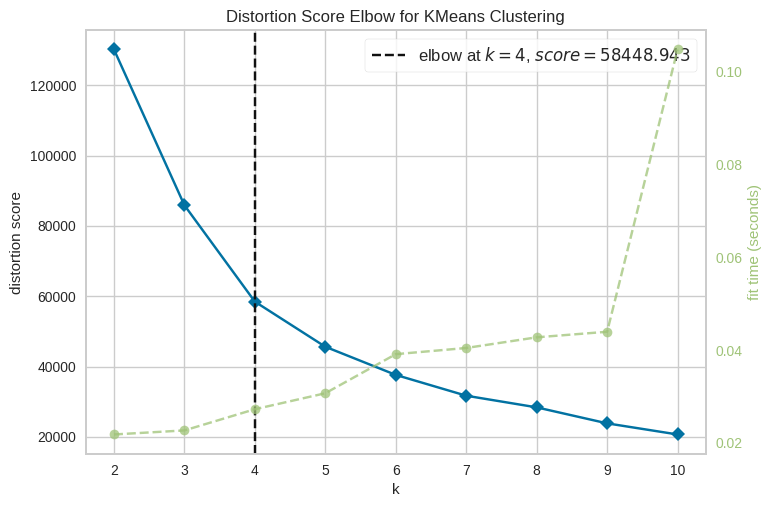

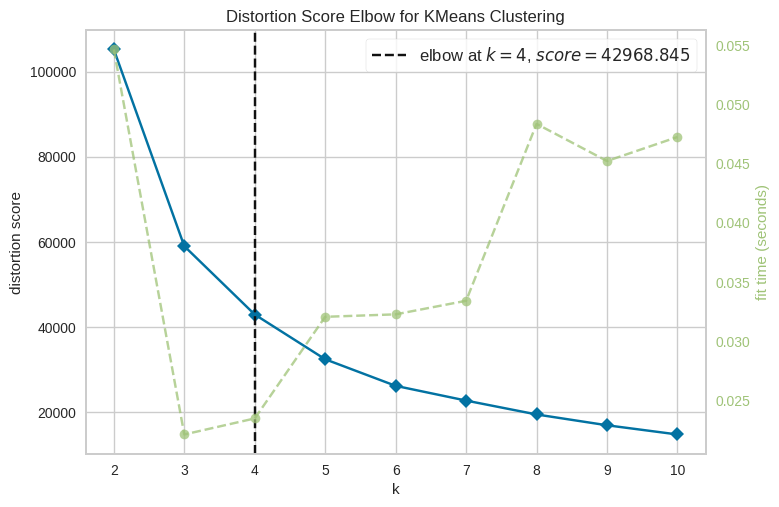

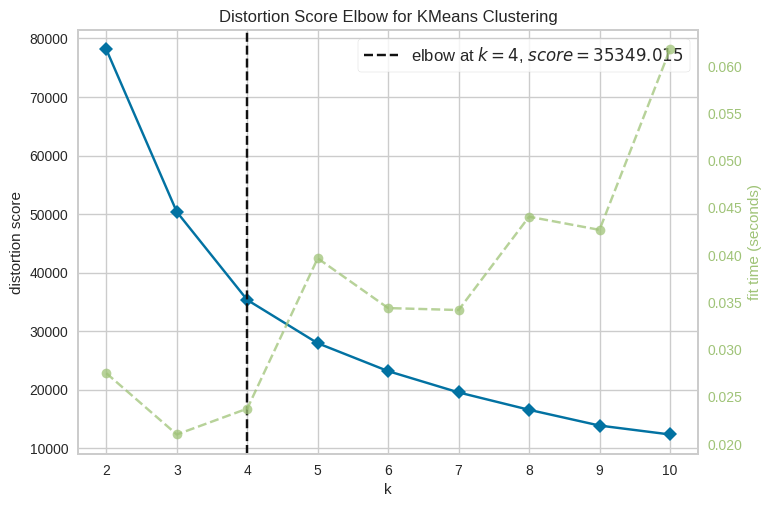

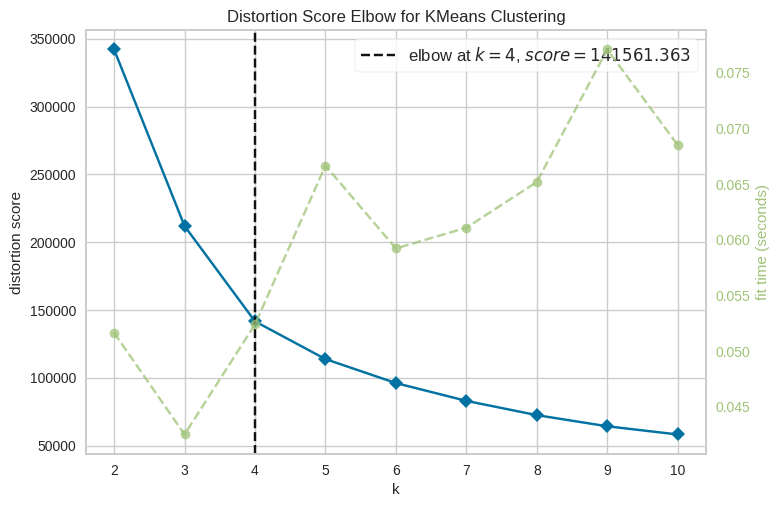

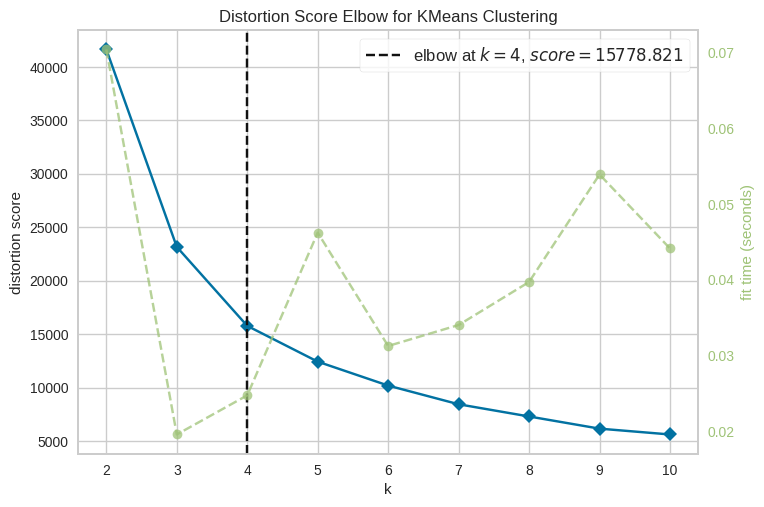

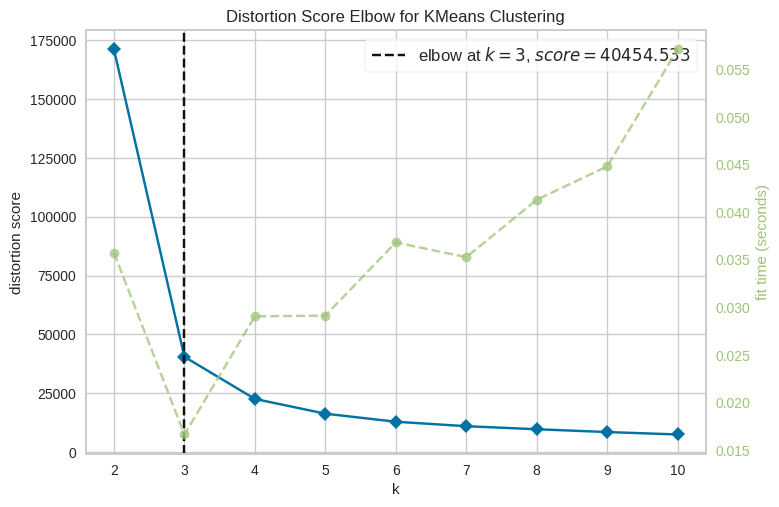

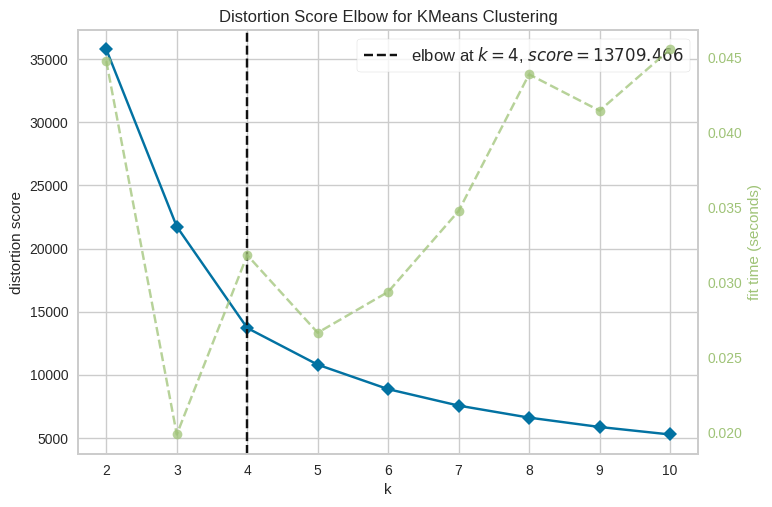

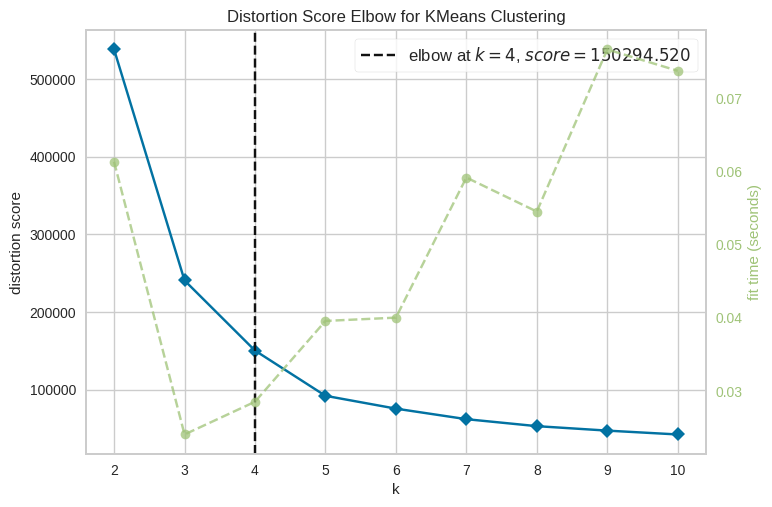

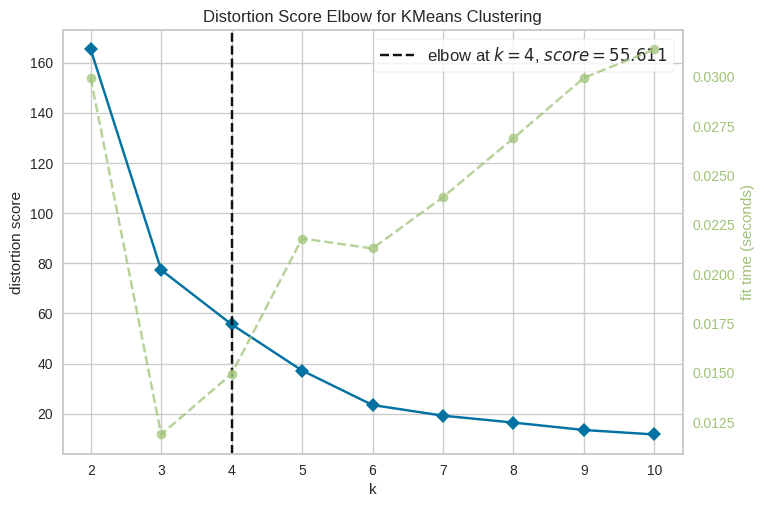

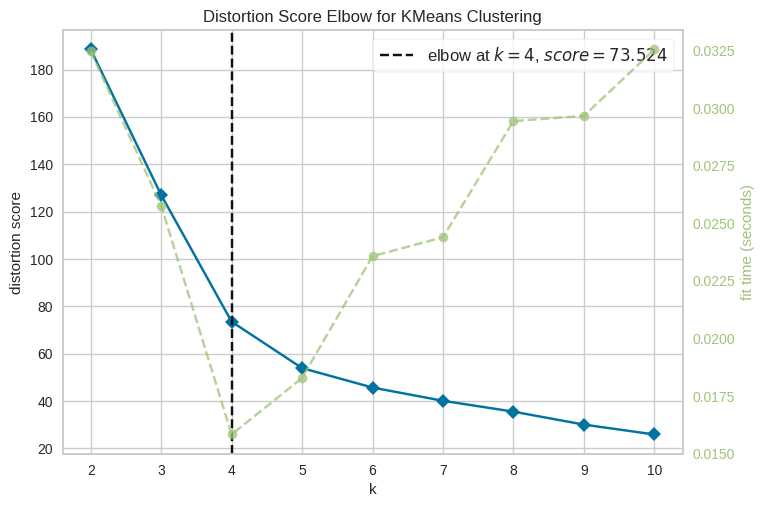

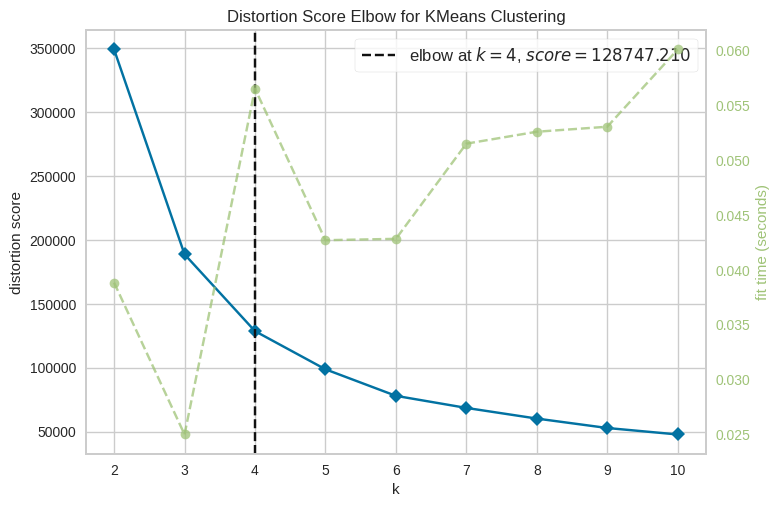

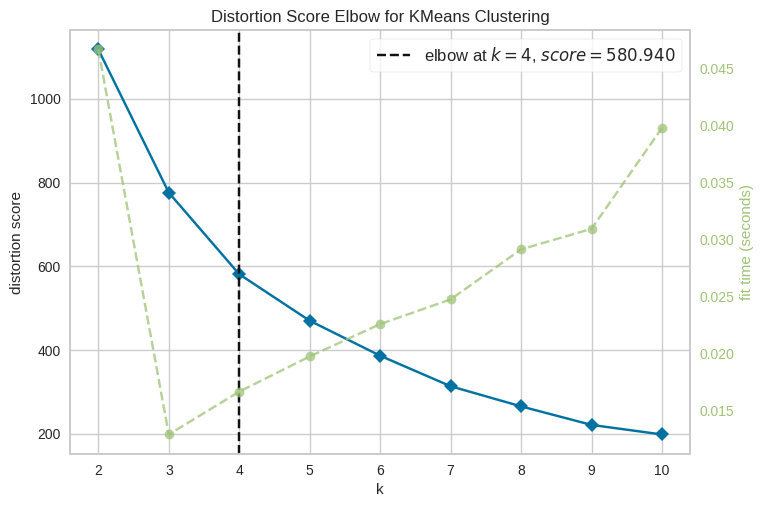

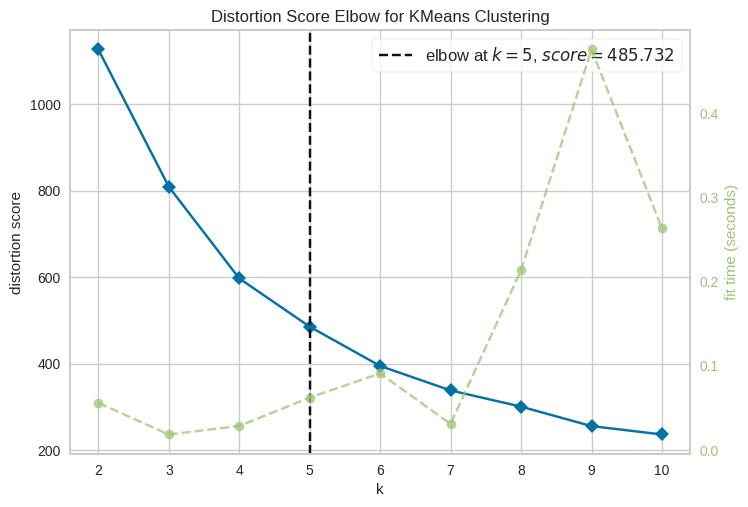

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import kelbow_visualizer, silhouette_visualizer
from sklearn.cluster import KMeans

for i in tsne_dict:
  kelbow_visualizer(KMeans(random_state=10, n_init=10), tsne_dict[i], k=(2, 11))

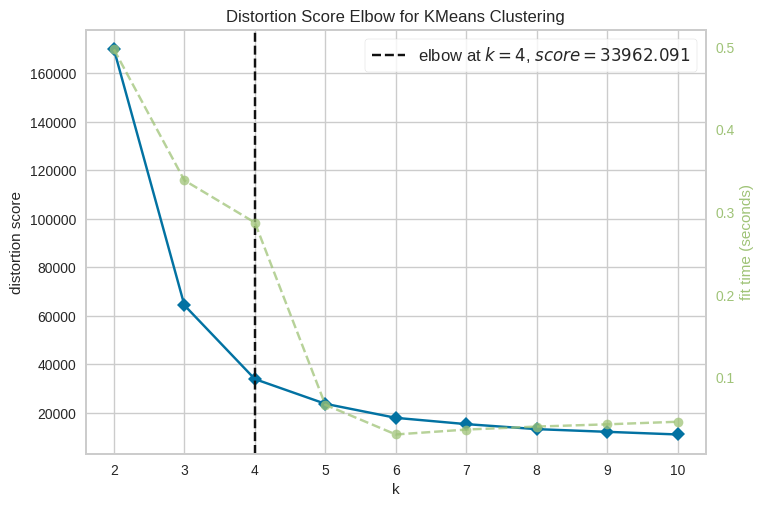

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, n_init=10, random_state=10),
                 k=(2, 11))

In [ ]:
kelbow_visualizer(KMeans(random_state=10, n_init=10), gk_tsne, k=(2, 11))

# Silhouette Method

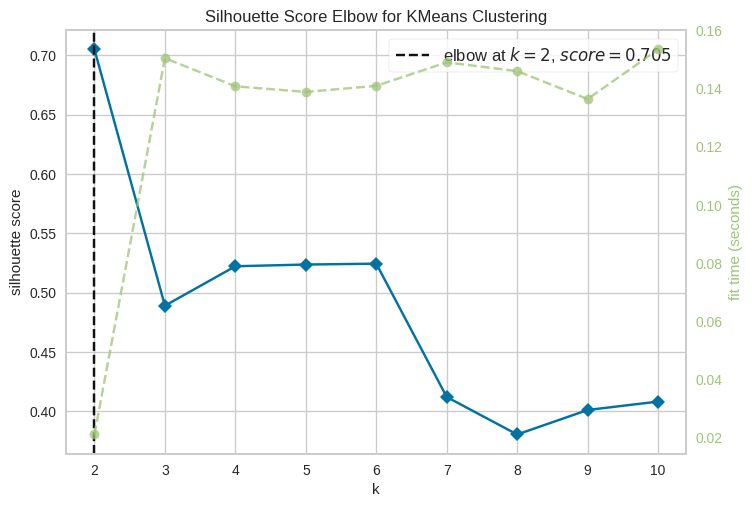

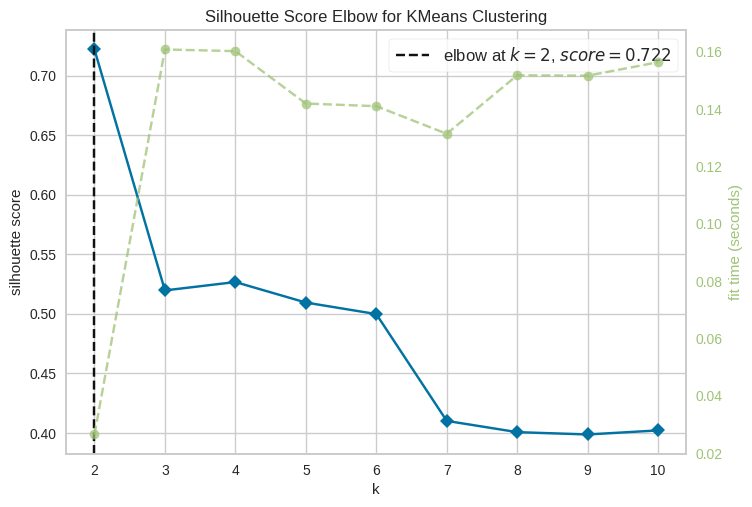

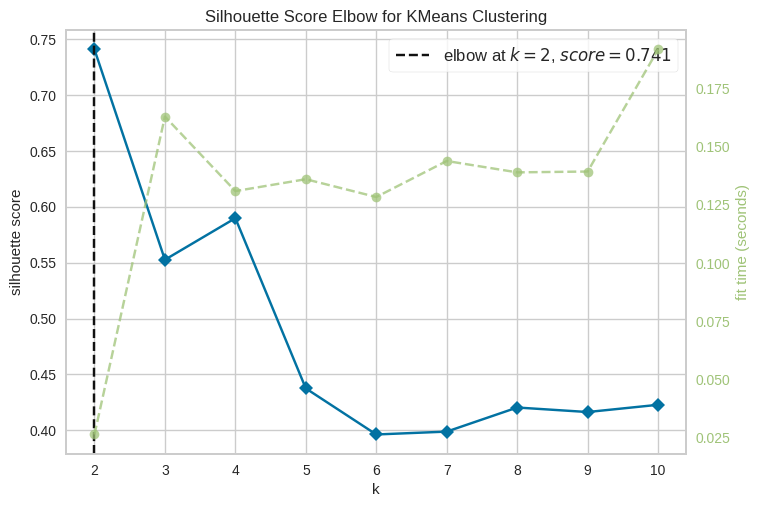

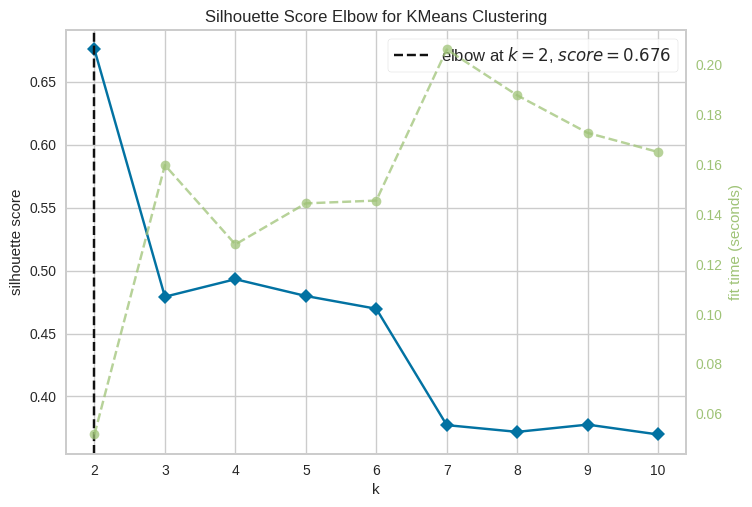

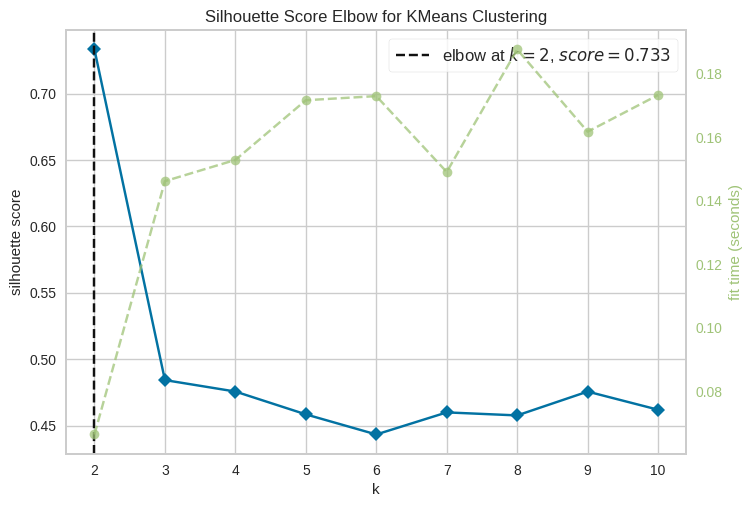

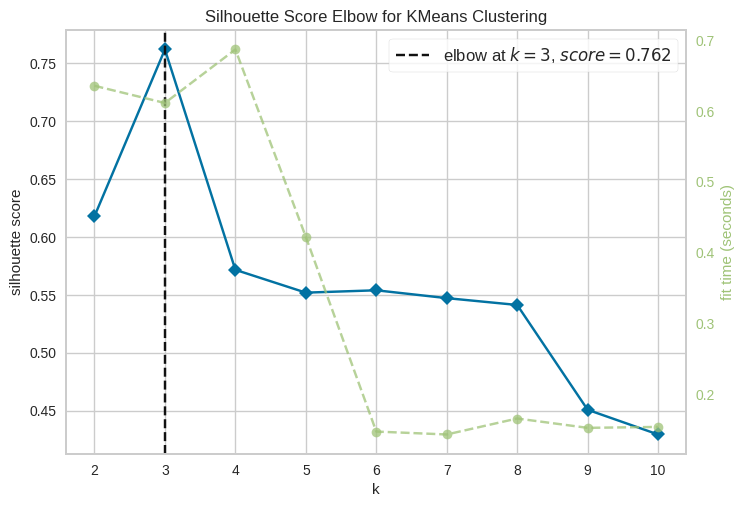

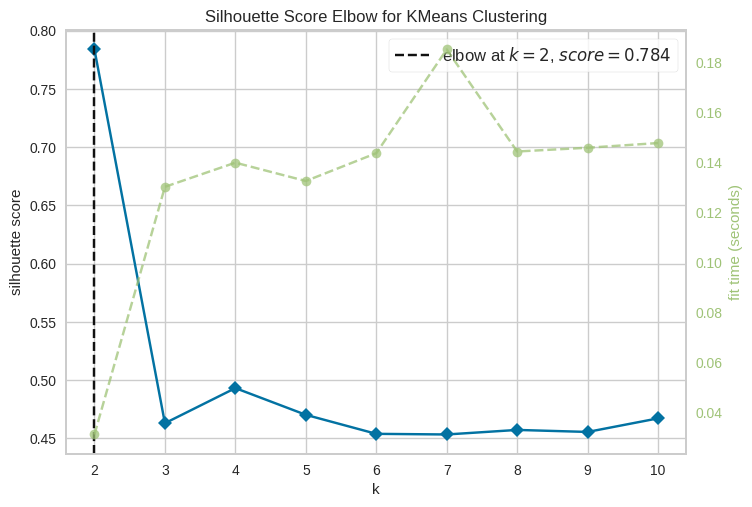

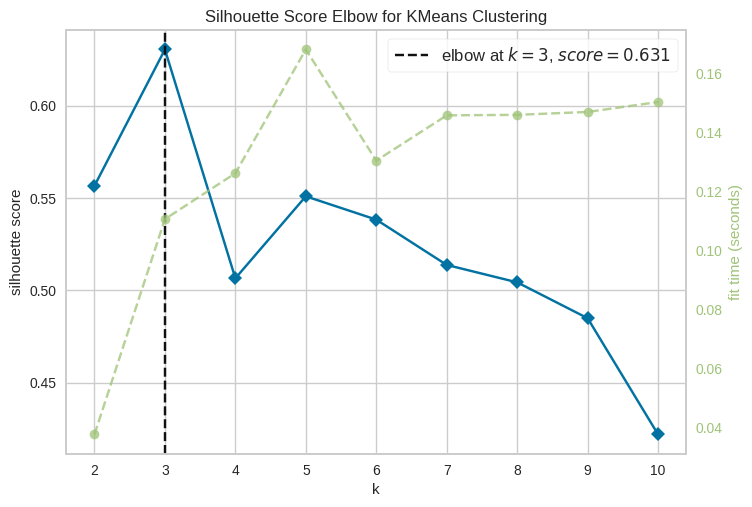

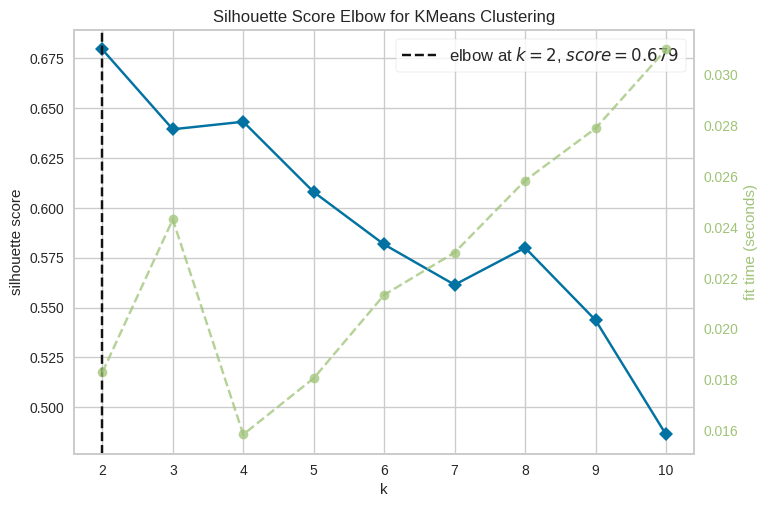

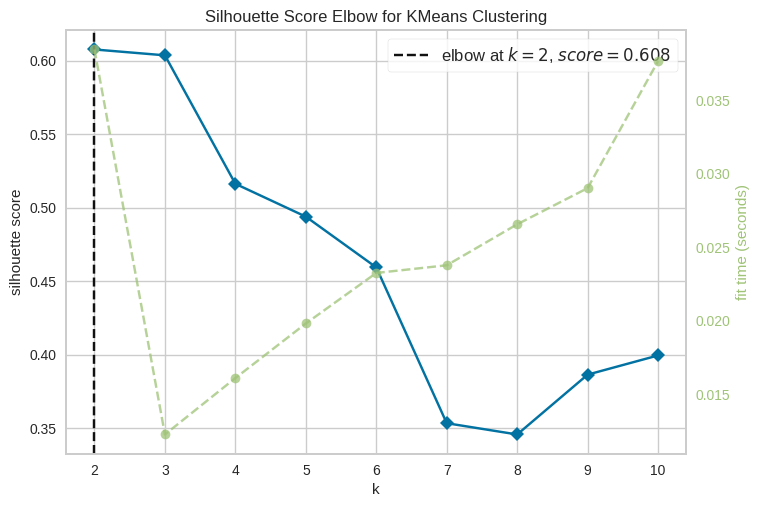

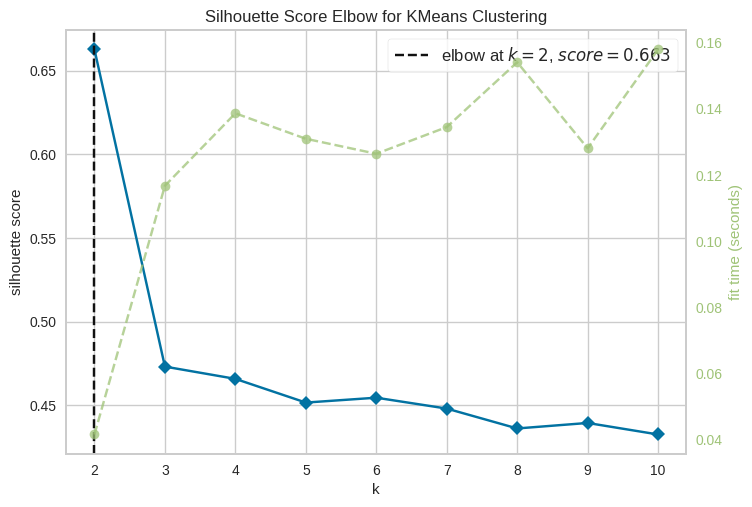

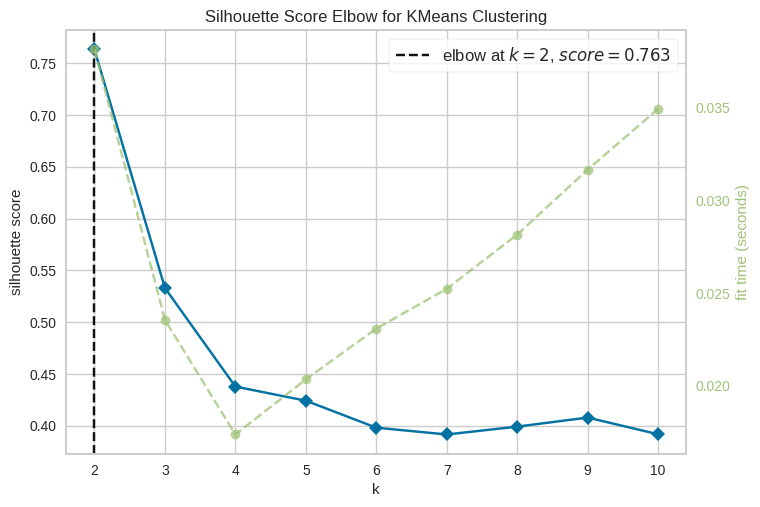

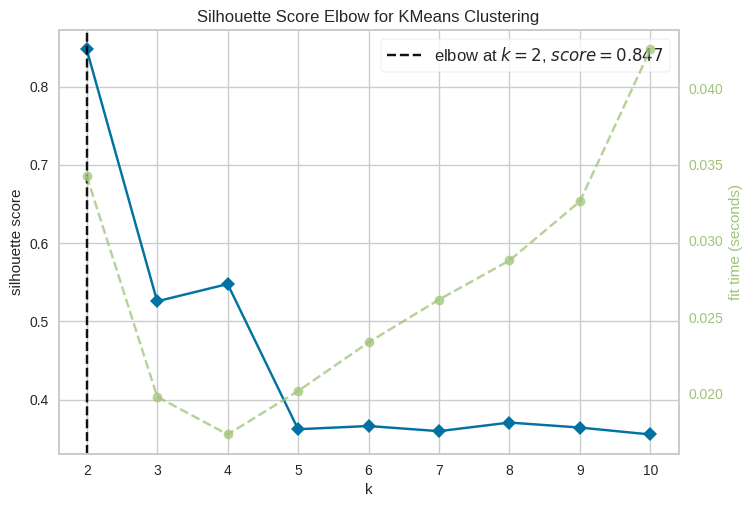

In [ ]:
for i in tsne_dict:
  kelbow_visualizer(KMeans(random_state=10, n_init=10), tsne_dict[i], k=(2, 11), metric = 'silhouette')

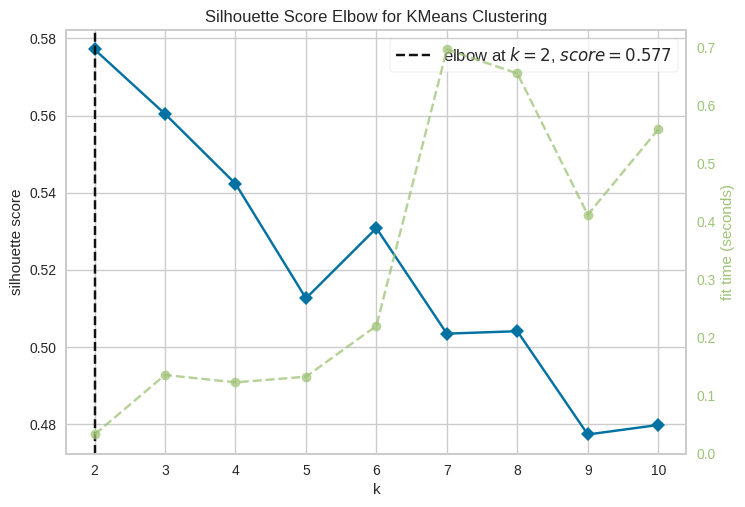

KElbowVisualizer(ax=<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>,
                 estimator=KMeans(n_clusters=10, n_init=10, random_state=10),
                 k=(2, 11), metric='silhouette')

In [ ]:
kelbow_visualizer(KMeans(random_state=10, n_init=10), gk_tsne, k=(2, 11), metric = 'silhouette')

# Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


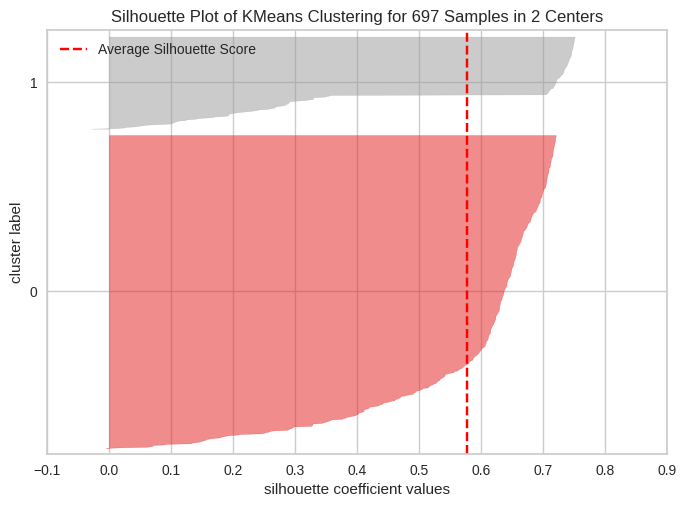

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


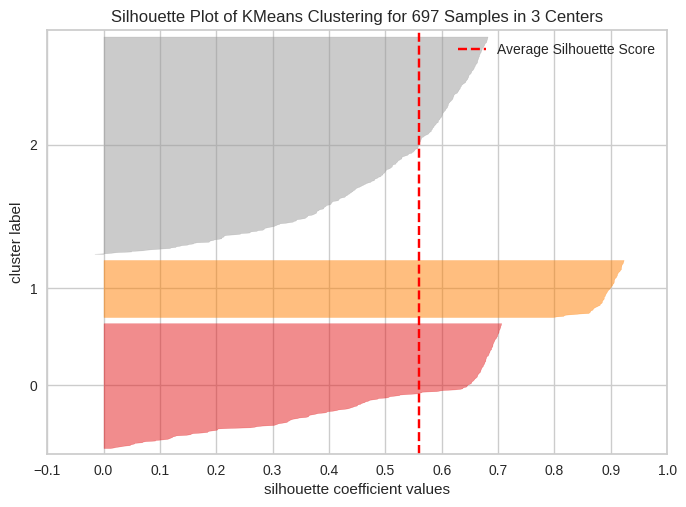

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


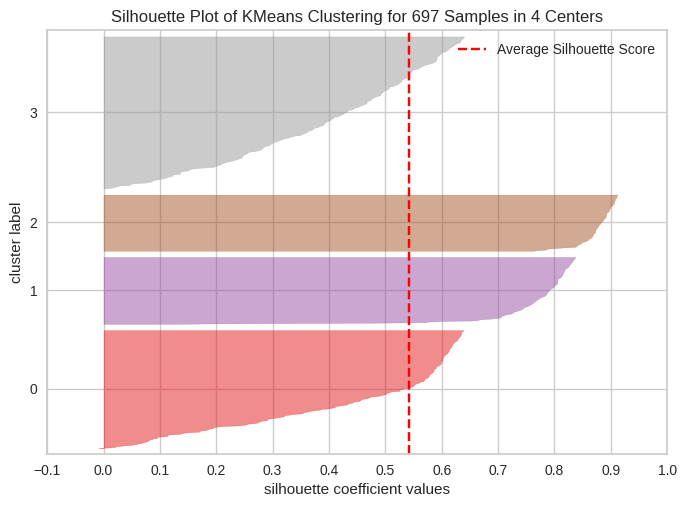

In [ ]:
for k in (2, 3, 4):
  silhouette_visualizer(KMeans(n_clusters= k, random_state=10), gk_tsne)

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


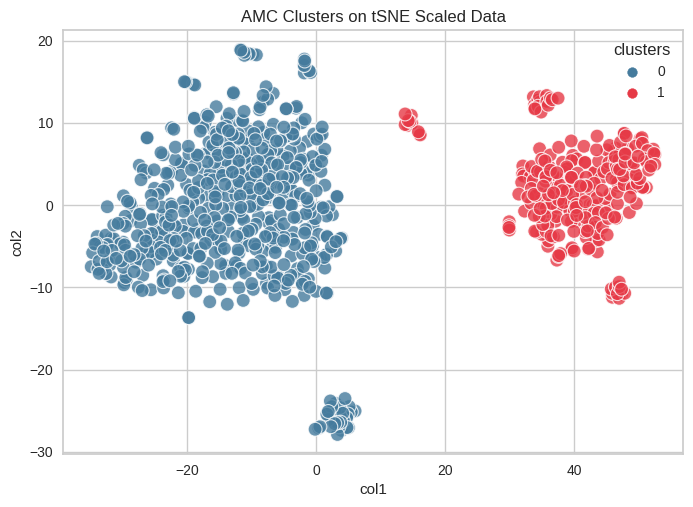

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


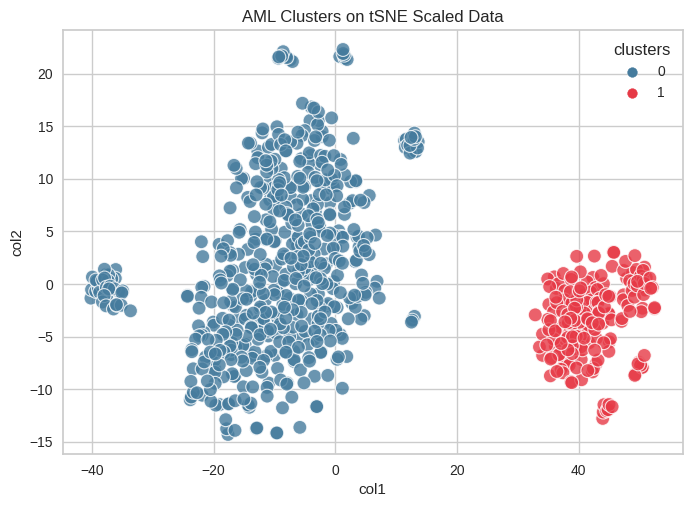

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


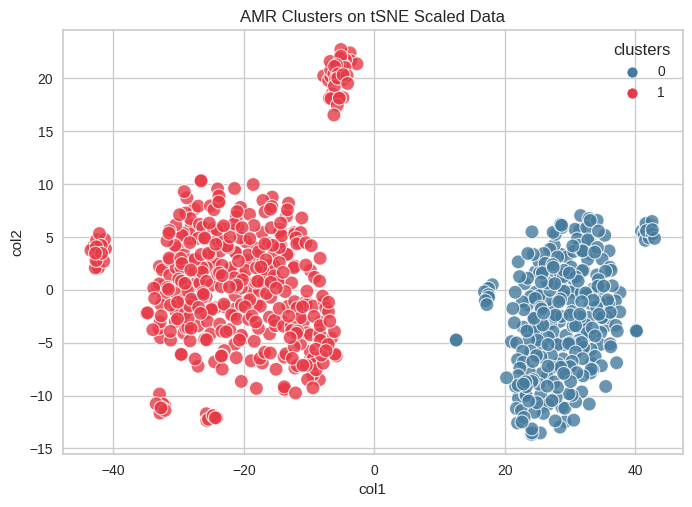

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


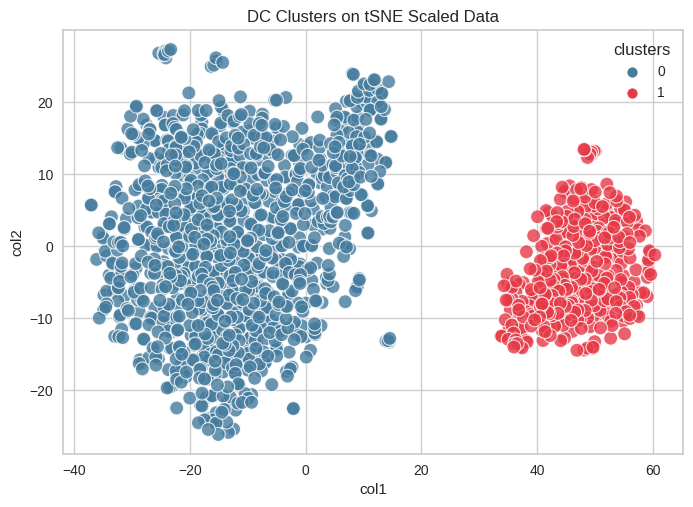

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


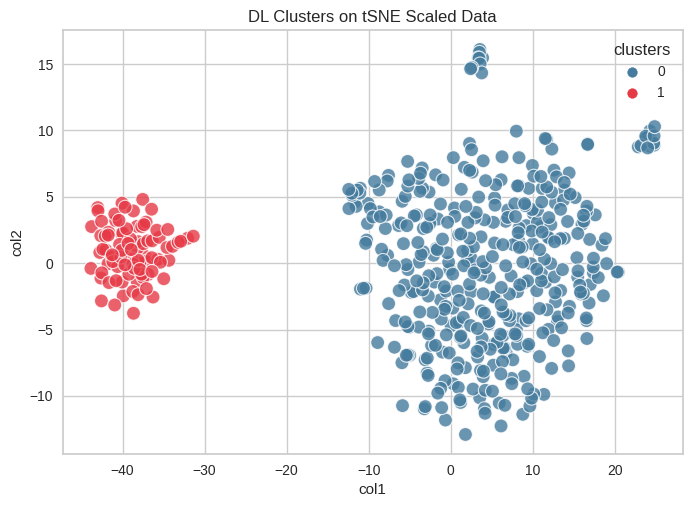

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


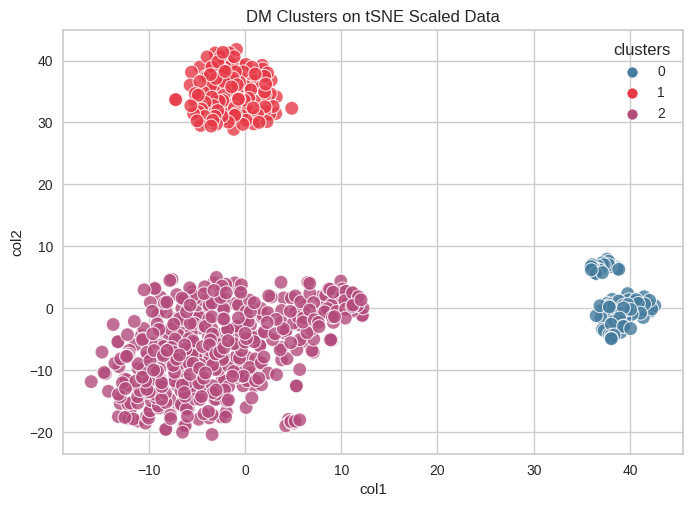

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


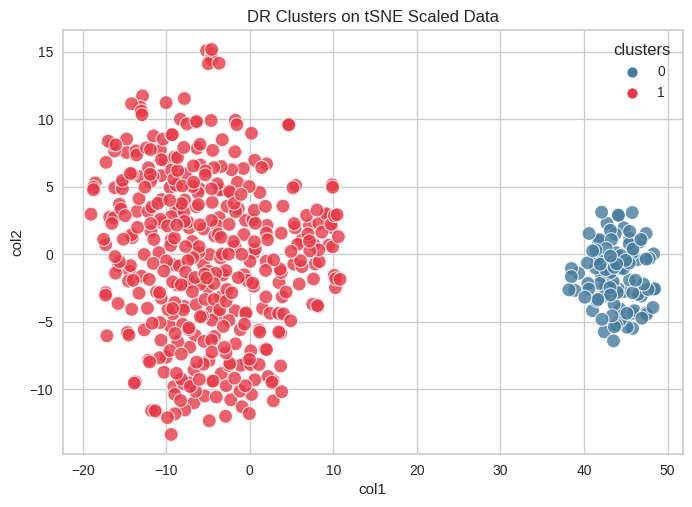

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


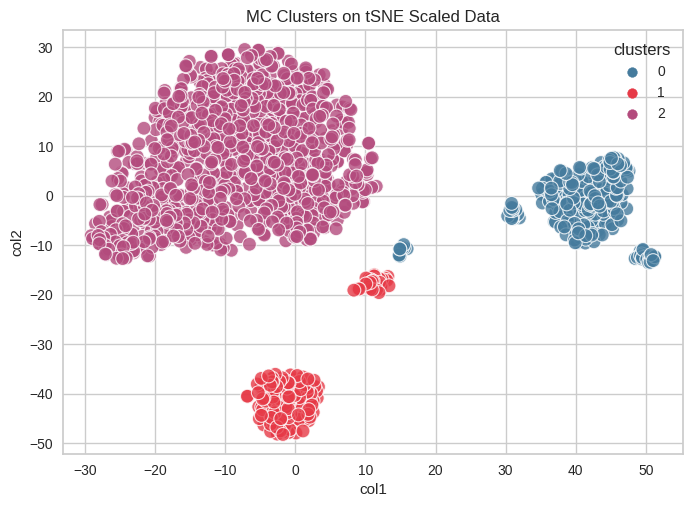

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


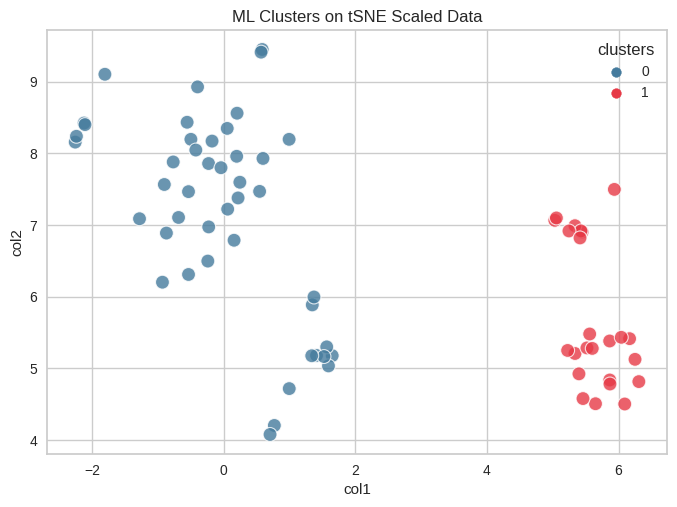

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


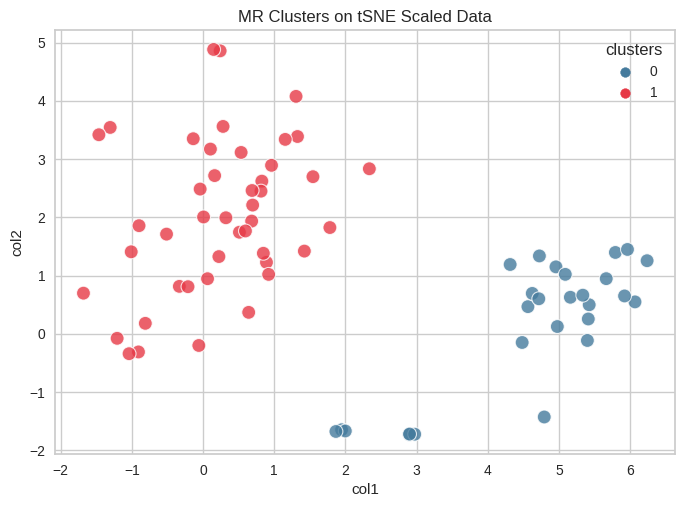

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


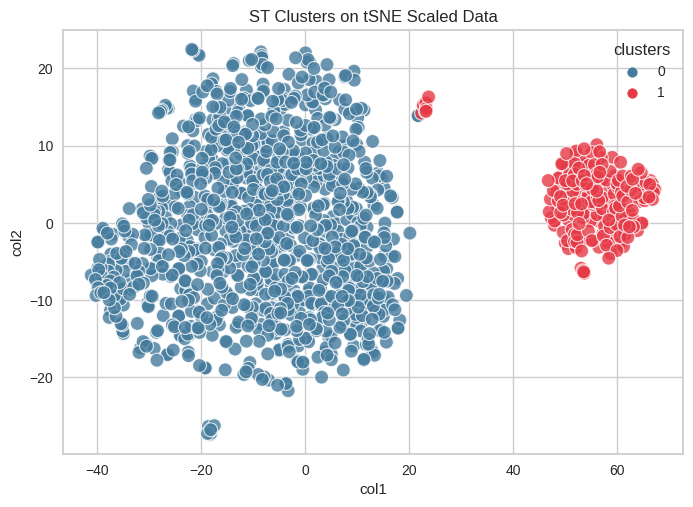

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


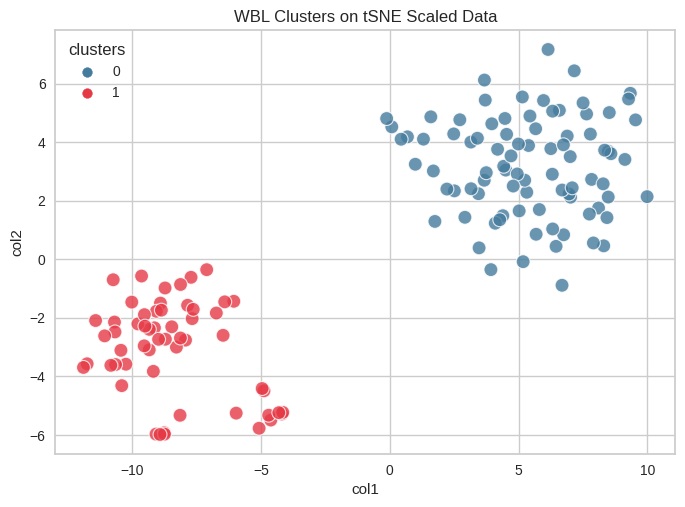

<ipython-input-45-65688fe3d876>:23: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


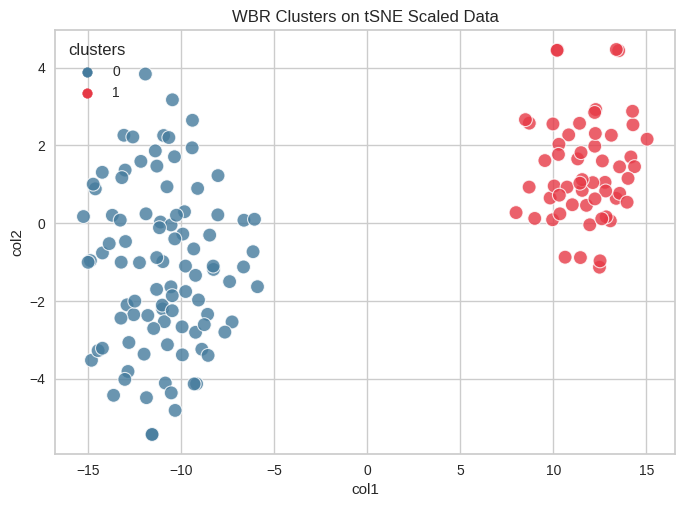

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

custom_palette = ["#457b9d", "#e63946", "#B34B7D", "#4D8C60"]

cluster_dict = {'AMC': 2, 'AML': 2, 'AMR': 2, 'DC': 2, 'DL': 2, 'DM': 3, 'DR': 2,
                'MC': 3, 'ML': 2, 'MR': 2, 'ST': 2, 'WBL': 2, 'WBR': 2}

rest_df_dt['cluster'] = ''
rest_df['cluster'] = ''

for key, value in cluster_dict.items():
  kmeans = KMeans(n_clusters=value, n_init=10, random_state=14)
  kmeans.fit(tsne_dict[key])
  cluster_df = pd.DataFrame(tsne_dict[key], columns=['col1', 'col2'])
  cluster_df['clusters'] = kmeans.labels_
  cluster_labels = [f'{key}_{label}' for label in kmeans.labels_]
  rest_df_dt.loc[rest_df_dt[key] == 1, 'cluster'] += cluster_labels
  rest_df.loc[rest_df[key] == 1, 'cluster'] += cluster_labels
  plt.title("{} Clusters on tSNE Scaled Data".format(key))

  sns.scatterplot(
    data=cluster_df,
    x='col1',
    y='col2',
    hue='clusters',
    palette=custom_palette,
    s=100,
    alpha=0.8
  )

  plt.show()

<ipython-input-46-fc6e136662c9>:14: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.scatterplot(


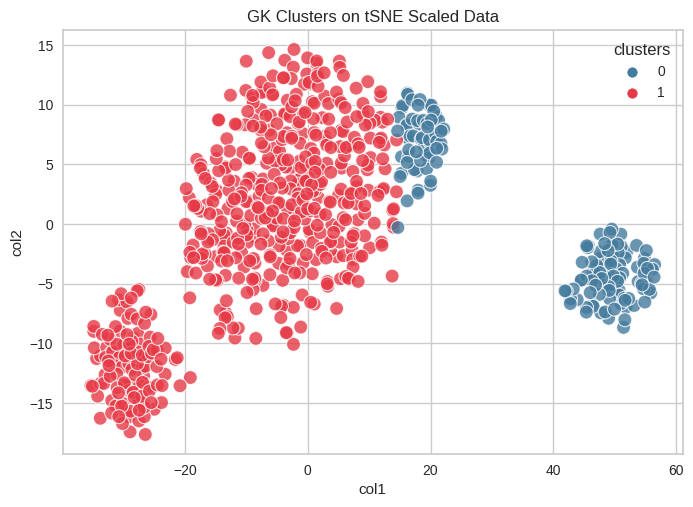

<ipython-input-46-fc6e136662c9>:14: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


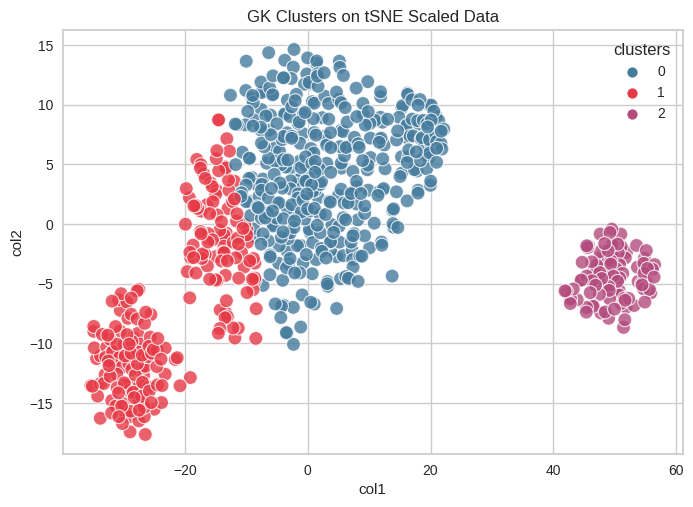

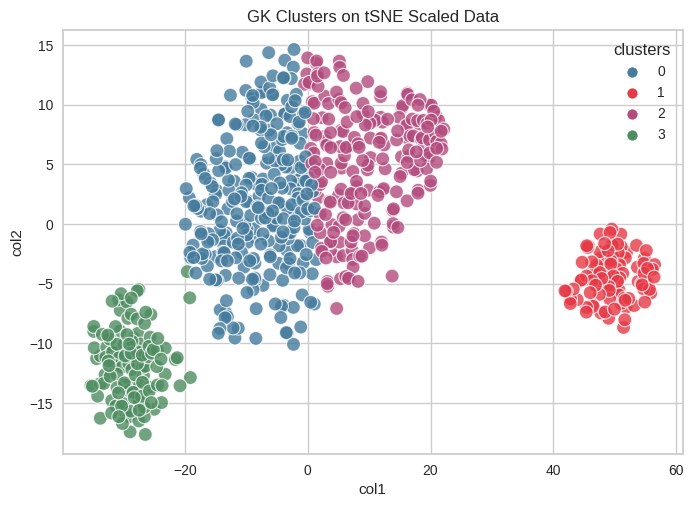

In [ ]:
GK_df_dt['cluster'] = ''
GK_df['cluster'] = ''

for i in range(2,5):
  kmeans = KMeans(n_clusters= i, n_init=10, random_state=14)
  kmeans.fit(gk_tsne)
  gk_cluster_df = pd.DataFrame(gk_tsne, columns=['col1', 'col2'])
  gk_cluster_df['clusters'] = kmeans.labels_
  gk_cluster_labels = [f'gk_{label}' for label in kmeans.labels_]
  GK_df_dt['cluster'] = gk_cluster_labels
  GK_df['cluster'] = gk_cluster_labels
  plt.title("GK Clusters on tSNE Scaled Data")

  sns.scatterplot(
    data=gk_cluster_df,
    x='col1',
    y='col2',
    hue='clusters',
    palette=custom_palette,
    s=100,
    alpha=0.8
  )

  plt.show()

In [ ]:
import re
rest_df_dt['cluster'] = rest_df_dt['cluster'].apply(lambda x: re.findall(r'[A-Za-z]+_\d+', x))
GK_df_dt['cluster'] = GK_df_dt['cluster'].apply(lambda x: re.findall(r'[A-Za-z]+_\d+', x))

In [ ]:
rest_df['cluster'] = rest_df['cluster'].apply(lambda x: re.findall(r'[A-Za-z]+_\d+', x))
GK_df['cluster'] = GK_df['cluster'].apply(lambda x: re.findall(r'[A-Za-z]+_\d+', x))

In [ ]:
GK_df.to_csv('GK_df.csv')
GK_df_dt.to_csv('GK_df_dt.csv')

# STREAMLIT WEB SERVING

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.8 MB/s eta 0:00:00


In [ ]:
!pip install flagpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.6 MB/s eta 0:00:00


# START FROM HERE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%writefile app.py
import pandas as pd
import numpy as np
import streamlit as st
import re
import os
import base64
import time
from PIL import Image
from ast import literal_eval
import plotly.graph_objects as go
import flagpy as fp

page_bg_img = """
<style>
[data-testid="stAppViewContainer"]{
  background-image: url("https://images.unsplash.com/photo-1431324155629-1a6deb1dec8d?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=1740&q=80");
  background-size: cover;
  }
[data-testid="stHeader"]{
  background-color: rgba(0,0,0,0);
  }
[data-testid="stToolbar"]{
  right: 2rem;
  background-color: #42F328;
  }
</style>
"""

st.markdown(page_bg_img, unsafe_allow_html = True)
st.markdown("""
<style>
[data-testid="stSidebar"]{
  background-color: #0F0F0F;
  color: #42F328;
  }
[data-testid="stMarkdownContainer"] > div > h2{
  color: white;
  }
[data-testid="stMarkdownContainer"]> p{
  color: white;
  }
</style>
""", unsafe_allow_html=True)

st.markdown("""
<style>
[data-testid="stMetricValue"]{
  color: #42F328;
  font-size: 40px;
  }
[data-testid="stMarkdownContainer"] > div > h3 > div > span{
  color: white;
}
</style>
""", unsafe_allow_html = True)

rest_df_dt= pd.read_csv('/content/drive/MyDrive/rest_df_dt.csv')
rest_df=pd.read_csv('/content/drive/MyDrive/rest_df.csv')
GK_df_dt = pd.read_csv('/content/drive/MyDrive/GK_df_dt.csv',index_col=0)
GK_df = pd.read_csv('/content/drive/MyDrive/GK_df.csv',index_col=0)

rest_df.loc[rest_df['pics'] == 'None', 'pics'] = 'https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1'
GK_df.loc[GK_df['pics'] == 'None', 'pics'] = 'https://img.a.transfermarkt.technology/portrait/header/default.jpg?lm=1'

rest_df_dt['cluster']=rest_df_dt['cluster'].apply(lambda x: literal_eval(x))
rest_df['cluster']=rest_df['cluster'].apply(lambda x: literal_eval(x))
GK_df_dt['cluster'] = GK_df_dt['cluster'].apply(lambda x: literal_eval(x))
GK_df['cluster'] = GK_df['cluster'].apply(lambda x: literal_eval(x))


def cosine_similarity(vec1, vec2):
  a = np.array(vec1).ravel()
  b = np.array(vec2).ravel()
  denom = np.sqrt(np.sum(np.square(vec1))) * np.sqrt(np.sum(np.square(vec2)))
  return np.dot(a,b) / denom

def similar_players(index, threshold):
  similarity_scores = {}
  for k, v in vectors.items():
    similarity_scores[k] = cosine_similarity(vectors[index], v)
  similarity_scores = {key: value for key, value in similarity_scores.items() if value >= threshold}

  return similarity_scores

st.sidebar.header("당신의 유망주를 찾아드립니다")
name_list=list(rest_df['Name'].values)+list(GK_df['Name'].values)
name_list.append('')
player_input= st.sidebar.selectbox('게임 내 좋아하는 선수를 입력하세요: ',name_list,index=7755)#
threshold = st.sidebar.number_input('최소 유사도를 입력해주세요 (90, 93, 95): ',0,99)
fm_image=Image.open('/content/drive/MyDrive/scouter_image2.png')
st.sidebar.image(fm_image)

if player_input in rest_df['Name'].values:
  temp_df = rest_df
  temp_df_dt = rest_df_dt
  categories = ['Defending','Physical','Speed', 'Vision', 'Attacking','Technique','Aerial','Mental']

  def skill_cal(youth1):
    defending = youth1['Tackling']*0.5 + youth1['Marking']*0.25 + youth1['Positioning']*0.25
    physical = youth1['Strength']*0.25 + youth1['Stamina']*0.25 + youth1['Balance']*0.25 + youth1['Agility']*0.25
    speed = youth1['Acceleration']*0.5 + youth1['Pace']*0.5
    vision = youth1['Vision']*0.33 + youth1['Flair']*0.33 + youth1['Passing']*0.34
    attacking = youth1['Finishing']*0.34 + youth1['Off The Ball']*0.33 + youth1['Composure']*0.33
    technique = youth1['Technique']*0.34 + youth1['First Touch']*0.33 + youth1['Dribbling']*0.33
    aerial = youth1['Heading']*0.5 + youth1['Jumping Reach']*0.5
    mental = (youth1['Determination'] + youth1['Decision'] + youth1['Anticipation']+ youth1['Teamwork'] + youth1['Bravery'] + youth1['Concentration'])*0.166
    return [defending, physical, speed, vision, attacking, technique, aerial, mental]

elif player_input in GK_df['Name'].values:
  temp_df = GK_df
  temp_df_dt = GK_df_dt
  categories = ['Distribution','Eccentricity','Mental','Shot Stopping','Physical','Speed','Aerial','Communication']

  def skill_cal(youth1):
    distribution = youth1['Passing']*0.25 + youth1['Vision']*0.25 + youth1['Kicking(GK)']*0.25 + youth1['Throwing(GK)']*0.25
    eccentricity = youth1['Aggression']*0.2 + youth1['Eccentricity(GK)']*0.8
    mental = (youth1['Anticipation'] + youth1['Bravery'] + youth1['Concentration'] +
    youth1['Determination'] + youth1['Teamwork'] + youth1['Decision']) *0.166
    shot_stopping = youth1['Reflexes(GK)']*0.3 + youth1['One On Ones(GK)']*0.3 + youth1['Handling(GK)']*0.2 + youth1['Punching(GK)']*0.2
    physical = youth1['Agility']*0.3 + youth1['Balance']*0.2 + youth1['Natural Fitness']*0.2 + youth1['Work Rate']*0.2 + youth1['Stamina']*0.1
    speed = youth1['Rushing Out(GK)']*0.6 + youth1['Pace']*0.4
    aerial = youth1['Aerial Reach(GK)']*0.8 + youth1['Jumping Reach']*0.2
    communication =  youth1['Communication(GK)']*0.7 + youth1['Command Of Area(GK)']*0.3
    return [distribution, eccentricity, mental, shot_stopping, physical, speed, aerial, communication]

else:
  raise 'Error'

# 선수에 해당하는 클러스터
cluster = temp_df_dt[temp_df_dt['Name'] == player_input]['cluster']
input_df = temp_df[temp_df['Name'] == player_input]
# 선수 클러스터에 해당하는 모든 선수 (scaled)
cl_df = temp_df_dt[temp_df_dt['cluster'].apply(lambda x: any(k in x for k in cluster.values[0]))]
# 선수 클러스터에 해당하는 모든 선수 (original)
original_df = temp_df[temp_df['cluster'].apply(lambda x: any(k in x for k in cluster.values[0]))]

# 필터된 데이터프레임 인덱스 초기화
cl_df = cl_df.reset_index(drop=True)
original_df = original_df.reset_index(drop=True)

# 플레이어 이름
player = cl_df[cl_df['Name'] == player_input].index[0]

# 선수 능력치 배열
cl_X = cl_df.iloc[:,1:-1].values

# 선수 이름 배열
cl_Y = cl_df.iloc[:,0].values

# 코사인 유사도 (threshold input으로 구현해야 됨)
vectors = {}
for i, x in enumerate(cl_X):
  vectors[i] = x.tolist()

threshold = threshold/100

if (threshold!=0):
  top_sim_players = similar_players(player, threshold)
  top_players = {}
  # 선수의 코사인 유사도를 기존 선수 데이터 딕셔너리에 삽입
  for index, similarity in top_sim_players.items():
      info = list(original_df.iloc[index].values)
      info.insert(1, similarity)
      top_players[index] = info
  lst = list(original_df.columns)
  lst.insert(1,'similarity')

  # 유사 선수 데이터 프레임 만들기
  output = pd.DataFrame.from_dict(data= top_players, orient = 'index', columns = lst)
  # 연령 제한 / 능력치 제한
  filtered_output = output[(output['Age'] <= 21) & (output['pa'] >= 130)].iloc[:,0:53]

  # 유사도 중복 기준 (소수 둘째까지 같으면 반올림)
  def similarity_key(similarity):
      return round(similarity, 2)

  sim = filtered_output['similarity'].apply(similarity_key)

  filtered_output.insert(1, 'sim', sim)
  st.write('가장 플레이스타일이 비슷한 유망주는....')

  # 유사도가 중복된다면 잠재 능력치 기준으로 정렬
  filtered_output = filtered_output.sort_values(by=['sim', 'pa'], ascending=False)
  first_similar_player=filtered_output.iloc[0]
  st.columns(3)[1].header(first_similar_player['Name'])

  categories = ['Defending','Physical','Speed', 'Vision', 'Attacking','Technique','Aerial','Mental']
  gk_categories = []

  youth = filtered_output.iloc[0]
  famous = input_df.iloc[0]

  fig = go.Figure()

  fig.add_trace(go.Scatterpolar(
      r= skill_cal(famous),
      theta=categories,
      fill='toself',
      name= f'{player_input}'))

  fig.add_trace(go.Scatterpolar(
      r=skill_cal(youth),
      theta=categories,
      fill='toself',
      opacity = 0.6,
      marker_color = 'green',
      fillcolor='#42F328',
      name= f"{first_similar_player['Name']}"))

  fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 20])),
                    plot_bgcolor = 'rgba(0,0,0,0)', paper_bgcolor = 'rgba(0,0,0,0)', showlegend=False)

  pics_row = original_df.loc[original_df.Name==first_similar_player['Name'],]
  image_adress = pics_row['pics'].values[0]

  # 다운받을 이미지 url
  url = image_adress

  # curl 요청
  os.system("curl " + url + " > test.jpg")

  img = Image.open("test.jpg")

  _, col2, col3 = st.columns(3)

  with col2:
    st.image(img)

  with col3:
    st.metric(label="유사도", value=f"{first_similar_player['sim']*100}%")

  st.columns(3)[1].subheader('나이: '+str(first_similar_player['Age']))
  st.columns(3)[1].subheader('포지션: '+str(first_similar_player['Position']))
  st.columns(3)[1].subheader('국적')

  flag_list = []
  try:
    for i in first_similar_player['Nationality'].split(','):
      idc = fp.get_flag_img(i)
      flag_list.append(idc)
    st.columns(3)[1].image(flag_list, width=100)
  except:
    st.columns(3)[1].subheader(first_similar_player['Nationality'])
  st.columns(3)[1].subheader('클럽: '+str(first_similar_player['Club']))

  st.plotly_chart(fig)

  video_row = original_df.loc[original_df.Name==first_similar_player['Name'],]
  video_adress = video_row['video'].values[0]
  try:
    st.video(video_adress, format='video/mp4', start_time=0)
  except:
    st.columns(3)[1].subheader('Search on Youtube')

  temp = filtered_output[['Name','similarity','Position','Age','Nationality','Club']]
  if len(filtered_output)>=6:
    st.write('그 외 유사 선수목록')
    st.table(temp.iloc[1:6].style.set_properties(**{'border': '1.5px solid #42F328','color': '#42F328'}))
  elif len(filtered_output)==1:
    st.write('그 외 유사선수가 존재하지 않습니다.')
  else:
    st.write('그 외 유사 선수목록')

Overwriting app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com
!streamlit run app.py & npx localtunnel --port 8501

35.222.238.71
[..................] / rollbackFailedOptional: verb npm-session 7cf55a6048243d2


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.222.238.71:8501

npx: installed 22 in 1.889s
your url is: https://olive-zebras-fix.loca.lt
2023-08-22 05:40:23.204 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 552, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 184, in <module>
    first_similar_player=filtered_output.iloc[0]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py", line 1073, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexing.py", line 1625, in _getitem_axis
    self._validate_integer(key, axis)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/i